In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df=pd.read_csv("ds_salary.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [9]:
del df[df. columns[0]] 

In [10]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [11]:
df.index.name='Index'
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Index,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
t = pd.pivot_table(df,values='salary_in_usd',
                   columns=['experience_level'],
                   index=['job_title'],
                  aggfunc="median")
data = pd.DataFrame(t)
data

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,5409.0,NaN
AI Scientist,15026.5,NaN,160000.0,55000.0
Analytics Engineer,NaN,155000.0,NaN,195000.0
Applied Data Scientist,110037.0,NaN,105619.0,278500.0
Applied Machine Learning Scientist,31875.0,NaN,75000.0,NaN
BI Data Analyst,32136.0,150000.0,98000.0,NaN
Big Data Architect,NaN,NaN,NaN,99703.0
Big Data Engineer,16228.0,NaN,22611.0,111535.5
Business Data Analyst,79551.0,NaN,70912.0,NaN


Mean salary by each level of experience

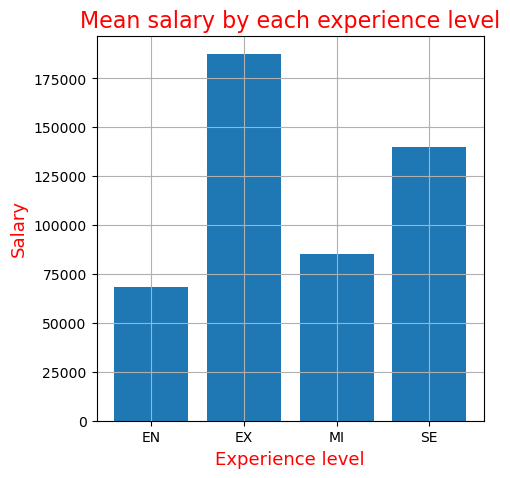

In [16]:
arr = np.array(df.groupby('experience_level').salary.median())

exp_lev = np.array(['EN','EX','MI','SE'])

fig, ax = plt.subplots()

ax.bar(exp_lev,arr)
ax.set_title("Mean salary by each experience level",fontdict={'size':16,'color':'red'})
ax.set_xlabel("Experience level",fontdict={'size':13,'color':'red'})
ax.set_ylabel("Salary",fontdict={'size':13,'color':'red'})
ax.grid()

fig.set_size_inches(5,5)
plt.show()

Distribution curve of salary in USD

In the above plot the avg salary is being paid to by experiene of employe
we can see that EX having highest mean salary

Distribution curve of salary in USD

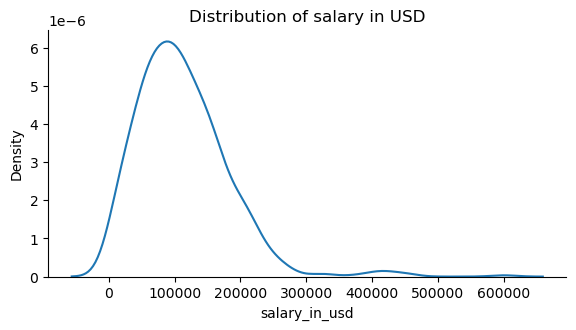

In [17]:
g = sns.displot(data=df, x='salary_in_usd', kind='kde', legend=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(6)
g.fig.set_figheight(3)

Histogram of Salary in USD

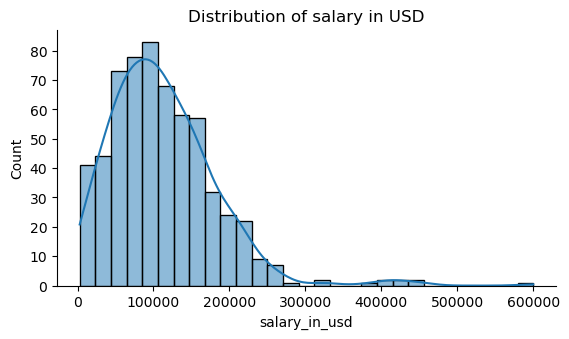

In [18]:
g = sns.displot(x=df['salary_in_usd'], data=df, kde=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(6)
g.fig.set_figheight(3)


Experience level Vs Remote level

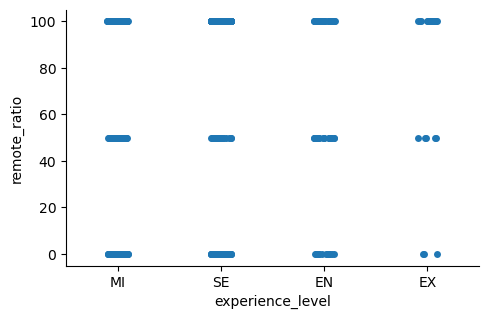

In [19]:
g = sns.catplot(x='experience_level', y='remote_ratio', data=df)
g.fig.set_figwidth(5)
g.fig.set_figheight(3)

Salary in USD for each type of employmwnt

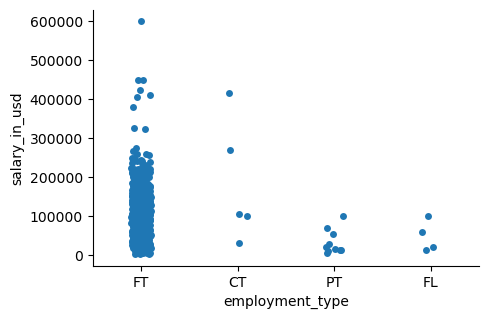

In [20]:
g = sns.catplot(x='employment_type', y='salary_in_usd', data=df)
g.fig.set_figwidth(5)
g.fig.set_figheight(3)

Salary in USD for each level of experience

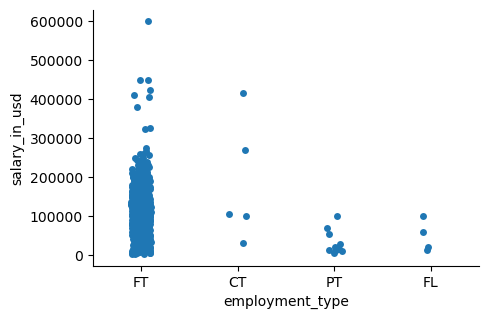

In [21]:
g = sns.catplot(x='employment_type', y='salary_in_usd', data=df)
g.fig.set_figwidth(5)
g.fig.set_figheight(3)

In [22]:
#total number of unique employees residence
df['employee_residence'].nunique()

57

Top 5 Employe residence with highest salary paid

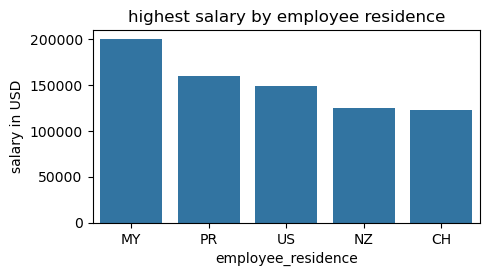

In [23]:
res = df.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=False)
res = res.head()
plt.figure(figsize=(5,2.5))
sns.barplot(x=res.index, y=res.values)
plt.title('highest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

Last 5 Employe residence with least salary paid

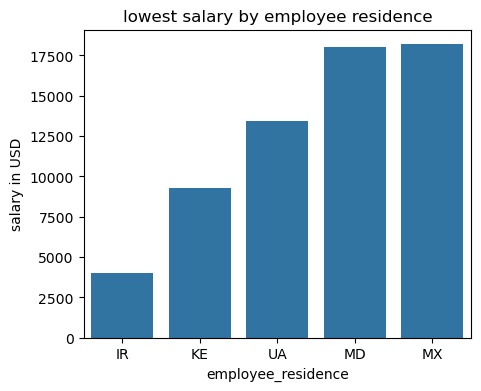

In [24]:
res1 = df.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=True)
res1 = res1.head()

plt.figure(figsize=(5,4))
sns.barplot(x=res1.index, y=res1.values)
plt.title('lowest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

Salary paid by company size

Text(0.5, 1.0, 'Salary by company size')

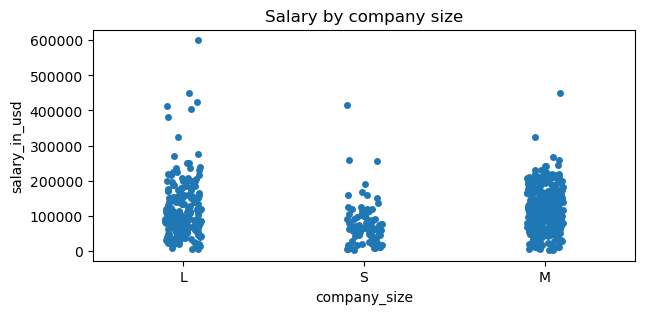

In [25]:
plt.figure(figsize=(7,3))
sns.stripplot(x=df['company_size'], y=df['salary_in_usd'], data=df).set_title('Salary by company size')


Salary paid at each remote ratio

Text(0.5, 1.0, 'Salary by remote ratio')

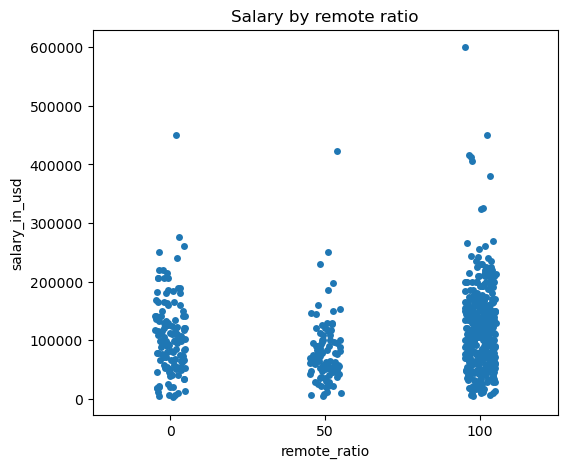

In [26]:
plt.figure(figsize=(6,5))
sns.stripplot(x=df['remote_ratio'], y=df['salary_in_usd'], data=df).set_title('Salary by remote ratio')


Relative share of Employee by remote work

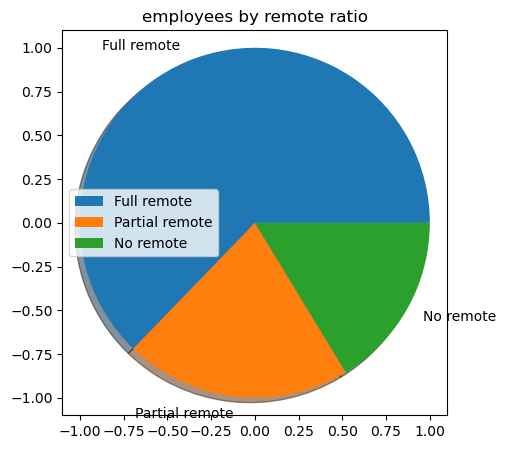

In [27]:
remo = np.array(df['remote_ratio'].value_counts(sort=True))

labels = ['Full remote', 'Partial remote', 'No remote']

plt.figure(figsize=(5,5))
plt.pie(remo, labels=labels, shadow=True, frame=True)
plt.legend()
plt.title('employees by remote ratio')
plt.show()

Relative share of employee by company size

company_size
L    198
S     83
M    326
Name: count, dtype: int64
the company size labels are:  ['L', 'S', 'M']


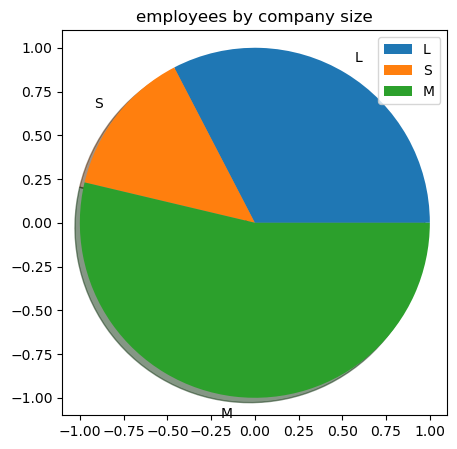

In [28]:
coms = df['company_size'].value_counts(sort=False)
print(coms)
Labels = [x for x in df['company_size'].unique()]
print('the company size labels are: ', Labels)
plt.figure(figsize=(5,5))
plt.pie(coms.values, labels=Labels, shadow=True, frame=True)
plt.legend()
plt.title('employees by company size')
plt.show()

Pivot table of maximum salary by company size and remote ratio

In [29]:

t2 = pd.pivot_table(df,
                   values='salary_in_usd',
                   index='remote_ratio',
                   columns='company_size',
                   aggfunc= "max"
                   )
pd.DataFrame(t2)

company_size,L,M,S
remote_ratio,,,
0,276000,450000,260000
50,423000,153000,160000
100,600000,324000,416000


Number of employee by year of joining

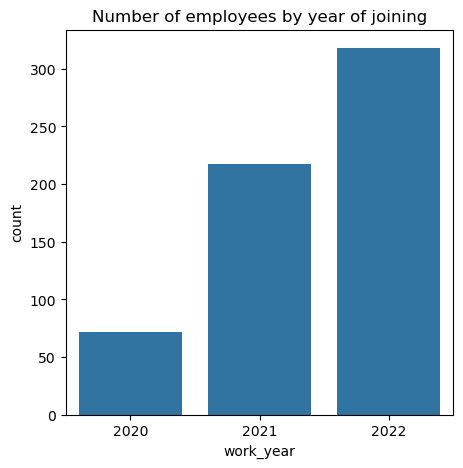

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['work_year'], data=df)
plt.title('Number of employees by year of joining')
plt.show()

In [31]:
df.index.name='Index'

In [32]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Index,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [33]:
df['company_location'].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

Distribution of Employe by experience level and company size

<function matplotlib.pyplot.show(close=None, block=None)>

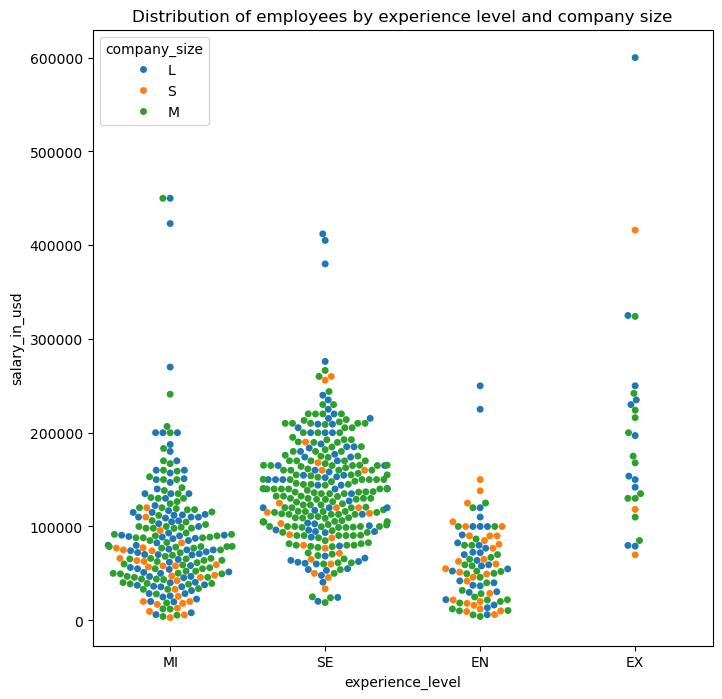

In [34]:
def swarm_plot(x, y, hue, data=df):
    plt.figure(figsize=(6,6))
    sns.swarmplot(x=x, y=y, hue=hue,data=df)
    plt.show
    
plt.figure(figsize=(8,8))
sns.swarmplot(x=df['experience_level'],
              y=df['salary_in_usd'],
              hue=df['company_size'],
              data=df)
plt.title("Distribution of employees by experience level and company size")
plt.show

In [35]:
lis = [df['company_location'].str.fullmatch(df['employee_residence'].at[idx], case=True).at[idx]
      for idx,i in enumerate(df['company_location'])]

print(lis)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, 

Which is the most popular job title

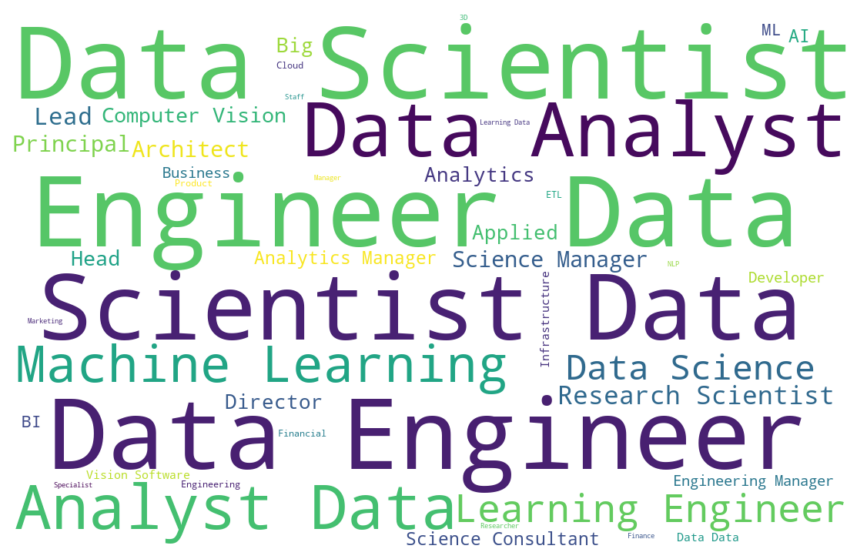

In [39]:
from wordcloud import WordCloud,STOPWORDS

fig = plt.gcf()
fig.set_size_inches(12,7)
wc = WordCloud(stopwords=STOPWORDS,
              background_color='white',
              contour_width=3,
              contour_color='red',
              width=1100,
              height=700,
              max_words=250,
              max_font_size=250,
              random_state=42
              )

wc.generate(' '.join(df['job_title']))
fig= plt.imshow(wc, interpolation= "bilinear")
fig= plt.axis('off')

Distribution of Employe by salaries

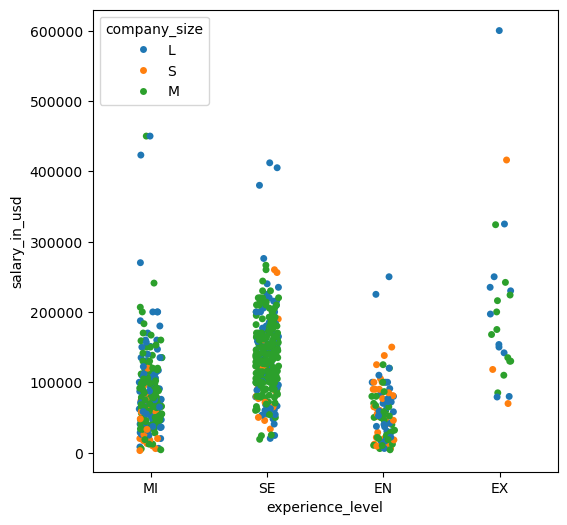

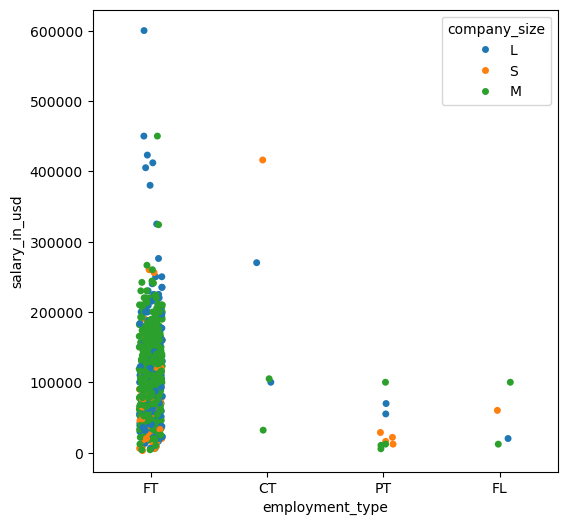

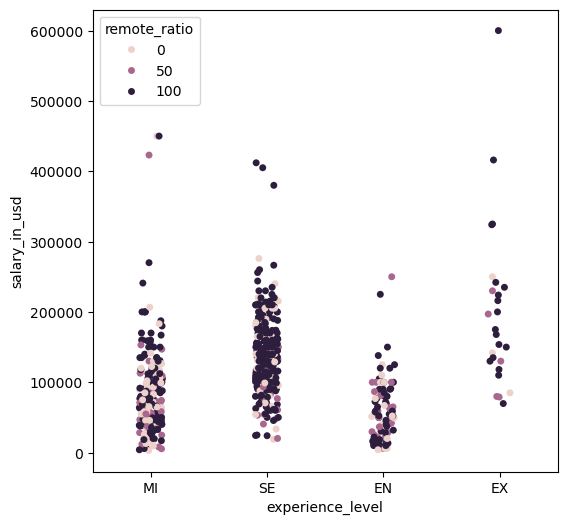

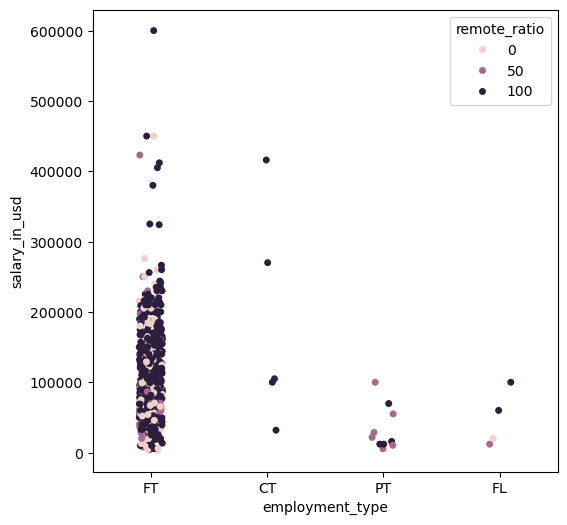

In [40]:
def strip_plot(x, y, hue, data=df):
    plt.figure(figsize=(6,6))
    sns.stripplot(x=x, y=y, hue=hue,data=df)
    plt.show
    
    
strip_plot(df['experience_level'],df['salary_in_usd'],df['company_size'], data=df)
strip_plot(df['employment_type'],df['salary_in_usd'],df['company_size'],data=df)
strip_plot(df['experience_level'],df['salary_in_usd'],df['remote_ratio'], data=df)
strip_plot(df['employment_type'],df['salary_in_usd'],df['remote_ratio'],data=df)

Does Employee live in as same country as their company location

<Axes: title={'center': 'Number of employees living same or different country-company location'}, xlabel='same/diff country company location', ylabel='Number of employees'>

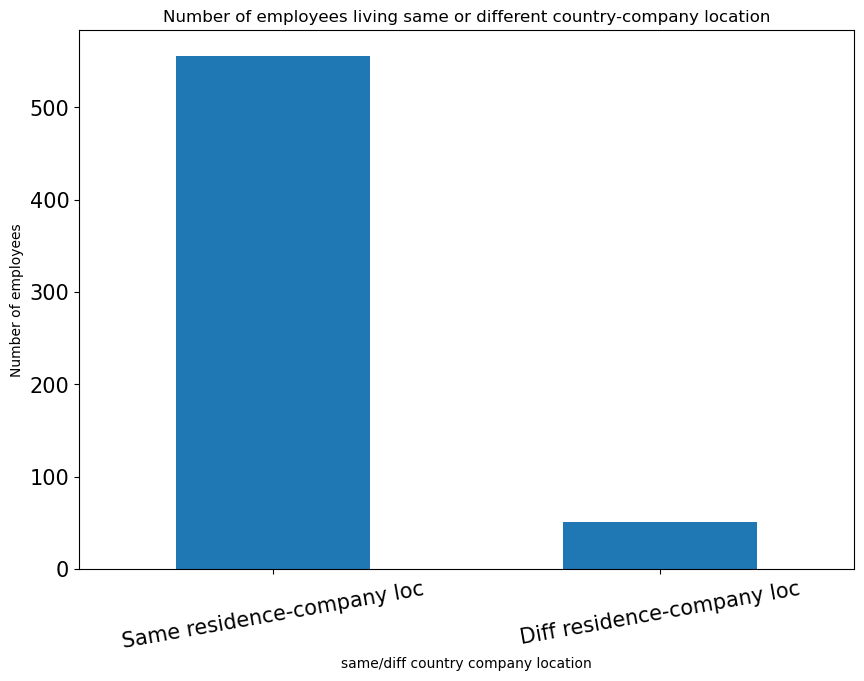

In [41]:
pd.Series(lis).map({True:"Same residence-company loc",
                    False:"Diff residence-company loc"}).value_counts().plot(kind='bar', rot=10,
                                                                            title='Number of employees living same or different country-company location',
                                                                            figsize=(10,7),
                                                                            xlabel='same/diff country company location',
                                                                            ylabel='Number of employees',
                                                                            fontsize=15,
                                                                            )

Thanks for looking at this notebook